<a href="https://colab.research.google.com/github/Gyuseo-stack/Statistics_DGS/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
airbnb = pd.read_csv('/content/sample_data/AB_NYC_2019.csv')
display(airbnb.head())

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

NameError: name 'airbnb' is not defined

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

다 드롭하기에는 아쉽지 않을까?
reviews_per_month 나 last_review같은 경우에는 더 분석 후 처리가 좋을라나???
예를 들어 number_of review가 0인 경우에 last_review는 0일 수 밖에 없음

In [ ]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
airbnb.head(5)

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

np.int64(0)

reviews_per_month 컬럼에서 NaN만 0으로 교체

In [ ]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [ ]:
airbnb.describe()

host_id      latitude     longitude         price  minimum_nights  \
count  4.889500e+04  48895.000000  48895.000000  48895.000000    48895.000000   
mean   6.762001e+07     40.728949    -73.952170    152.720687        7.029962   
std    7.861097e+07      0.054530      0.046157    240.154170       20.510550   
min    2.438000e+03     40.499790    -74.244420      0.000000        1.000000   
25%    7.822033e+06     40.690100    -73.983070     69.000000        1.000000   
50%    3.079382e+07     40.723070    -73.955680    106.000000        3.000000   
75%    1.074344e+08     40.763115    -73.936275    175.000000        5.000000   
max    2.743213e+08     40.913060    -73.712990  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       48895.000000       48895.000000                    48895.000000   
mean           23.274466           1.090910                        7.143982   
std            44.550582           1.597283                       32.952519   
min             0.000000           0.000000                        1.000000   
25%             1.000000           0.040000                        1.000000   
50%             5.000000           0.370000                        1.000000   
75%            24.000000           1.580000                        2.000000   
max           629.000000          58.500000                      327.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000

In [ ]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

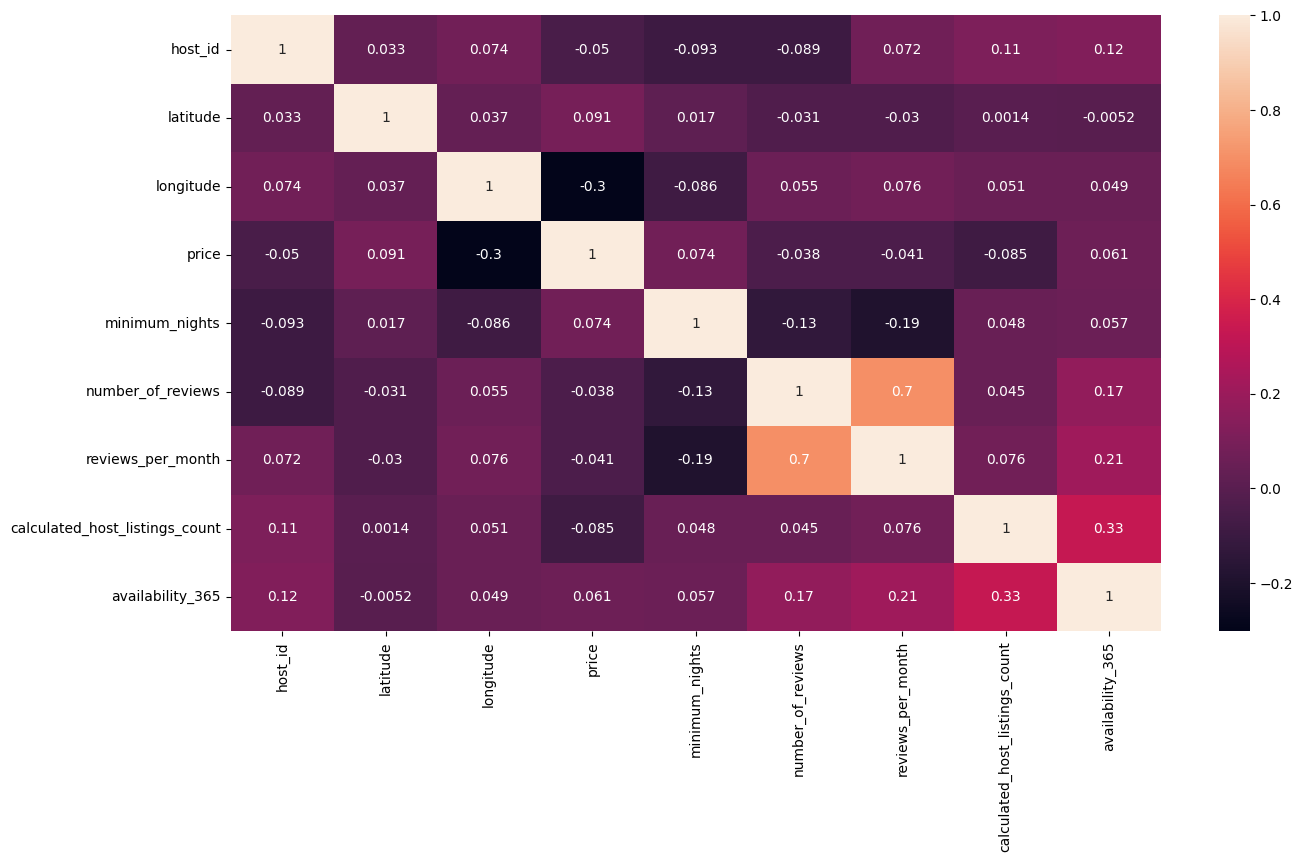

In [ ]:
corr = airbnb.select_dtypes(include=np.number).corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [ ]:
airbnb.shape

(48895, 12)

In [ ]:
airbnb.head(15)

host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0      2787            Brooklyn          Kensington  40.64749  -73.97237   
1      2845           Manhattan             Midtown  40.75362  -73.98377   
2      4632           Manhattan              Harlem  40.80902  -73.94190   
3      4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4      7192           Manhattan         East Harlem  40.79851  -73.94399   
5      7322           Manhattan         Murray Hill  40.74767  -73.97500   
6      7356            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7      8967           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8      7490           Manhattan     Upper West Side  40.80178  -73.96723   
9      7549           Manhattan           Chinatown  40.71344  -73.99037   
10     7702           Manhattan     Upper West Side  40.80316  -73.96545   
11     7989           Manhattan      Hell's Kitchen  40.76076  -73.98867   
12     9744            Brooklyn         South Slope  40.66829  -73.98779   
13    11528           Manhattan     Upper West Side  40.79826  -73.96113   
14    11975           Manhattan        West Village  40.73530  -74.00525   

          room_type  price  minimum_nights  number_of_reviews  \
0      Private room    149               1                  9   
1   Entire home/apt    225               1                 45   
2      Private room    150               3                  0   
3   Entire home/apt     89               1                270   
4   Entire home/apt     80              10                  9   
5   Entire home/apt    200               3                 74   
6      Private room     60              45                 49   
7      Private room     79               2                430   
8      Private room     79               2                118   
9   Entire home/apt    150               1                160   
10  Entire home/apt    135               5                 53   
11     Private room     85               2                188   
12     Private room     89               4                167   
13     Private room     85               2                113   
14  Entire home/apt    120              90                 27   

    reviews_per_month  calculated_host_listings_count  availability_365  
0                0.21                               6               365  
1                0.38                               2               355  
2                0.00                               1               365  
3                4.64                               1               194  
4                0.10                               1                 0  
5                0.59                               1               129  
6                0.40                               1                 0  
7                3.47                               1               220  
8                0.99                               1                 0  
9                1.33                               4               188  
10               0.43                               1                 6  
11               1.50                               1                39  
12               1.34                               3               314  
13               0.91                               1               333  
14               0.22                               1                 0

In [ ]:
import seaborn as sns

In [ ]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

unique 함수는 시리즈의 고유값들을 중복 없이 뽑아 NumPy ndarray로 돌려주는 판다스 메서드

Text(0.5, 1.0, 'Neighbourhood Group')

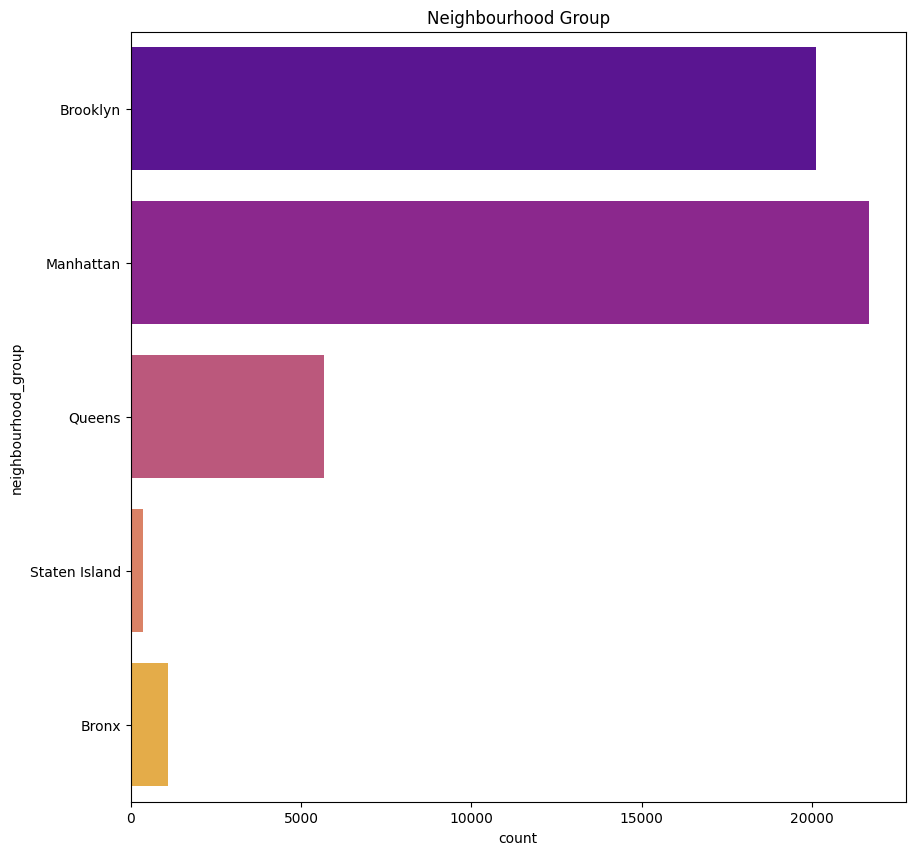

In [ ]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Text(0.5, 1.0, 'Neighbourhood')

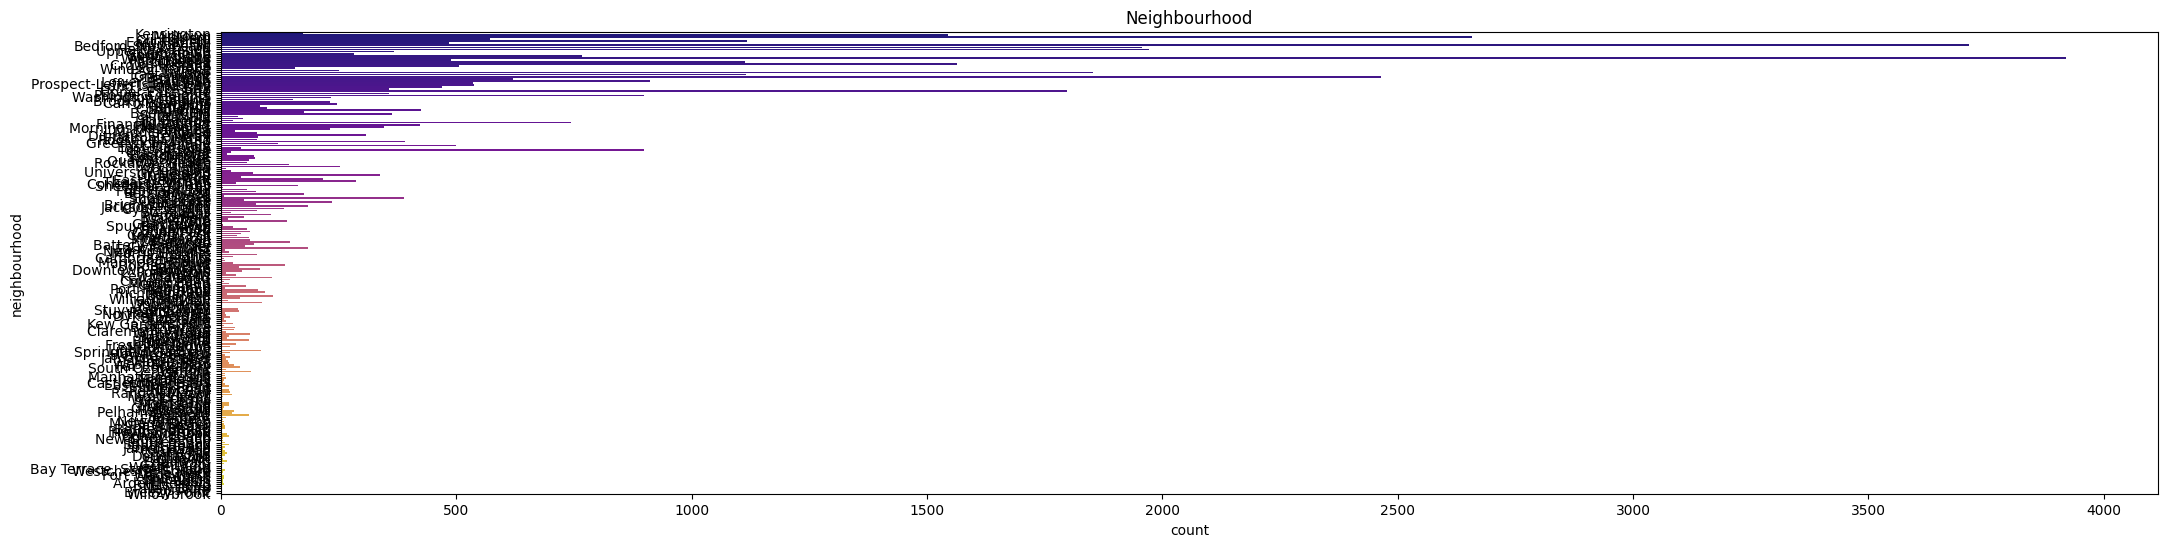

In [ ]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

이건 뭔 시각화임;;

Text(0.5, 1.0, 'Restaurants delivering online or Not')

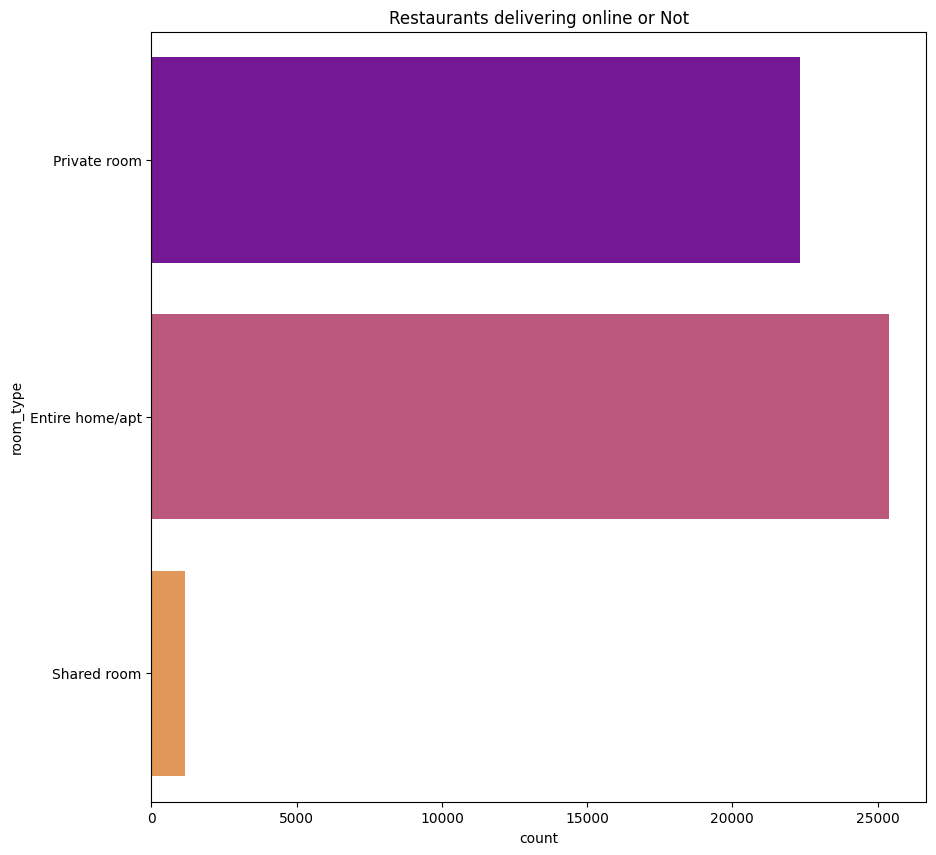

In [ ]:
#Restaurants delivering Online or not
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

제목 잘못 붙은거 아닌가...

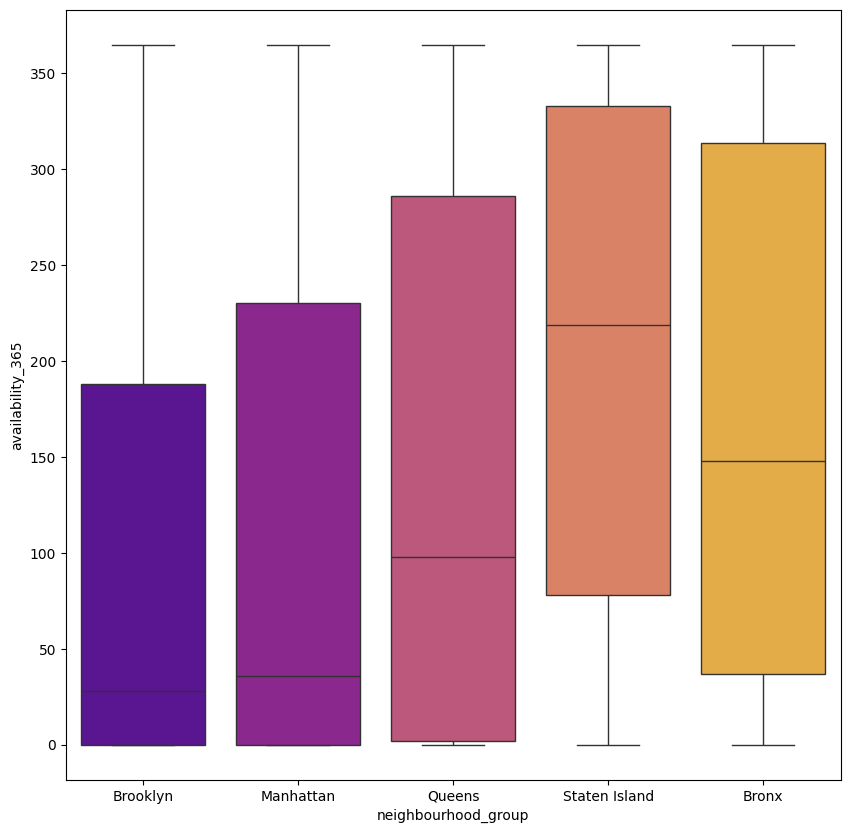

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=airbnb, x='neighbourhood_group',y='availability_365',palette='plasma')

숙소 비율을 제일 많이 차지하는 두 그룹 Brooklyn,Manhattan이
사용가능일 평균이 제일 작고,최대값도 제일 적음

가설 몇 가지 세울 수 있을듯
#### 가설 1. Manhattan과 Brooklyn의 숙소는 주로 호스트가 본인 거주 공간을 일부 공유하는 경우가 많아서 1년 내내 운영하기보다 부분적인 기간만 예약 가능하게 설정했을 것이다.

#### 가설 2. Manhattan, Brooklyn은 관광/비즈니스 수요가 많아 짧은 기간만 열어도 높은 수익을 보장받기 때문에 장기간 운영할 필요가 없다

또 있나..?

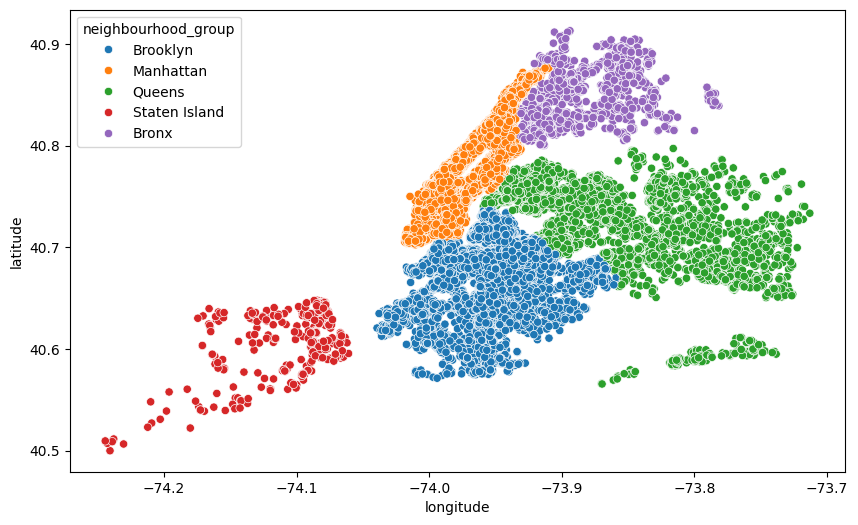

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

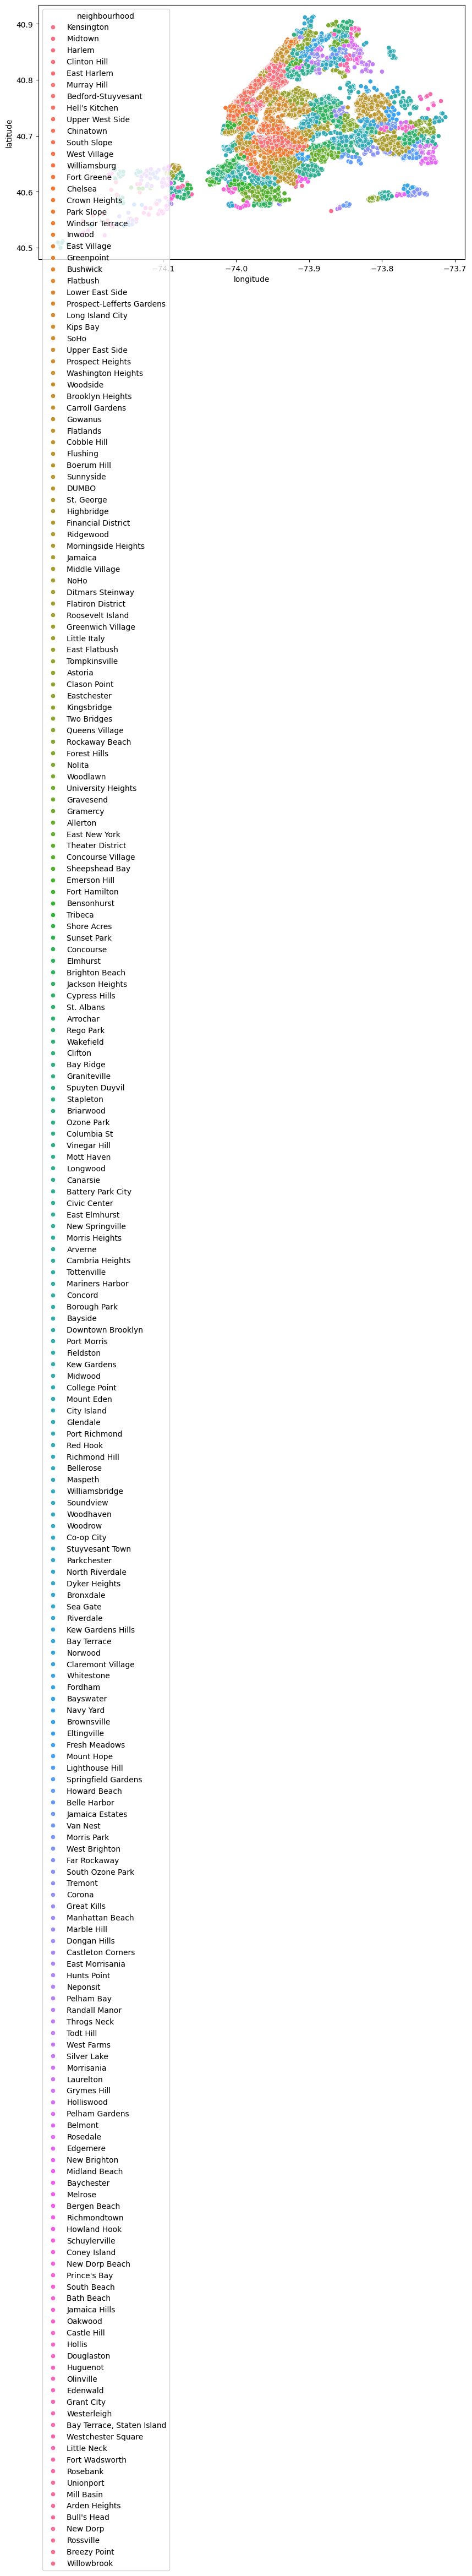

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.neighbourhood)
plt.show()

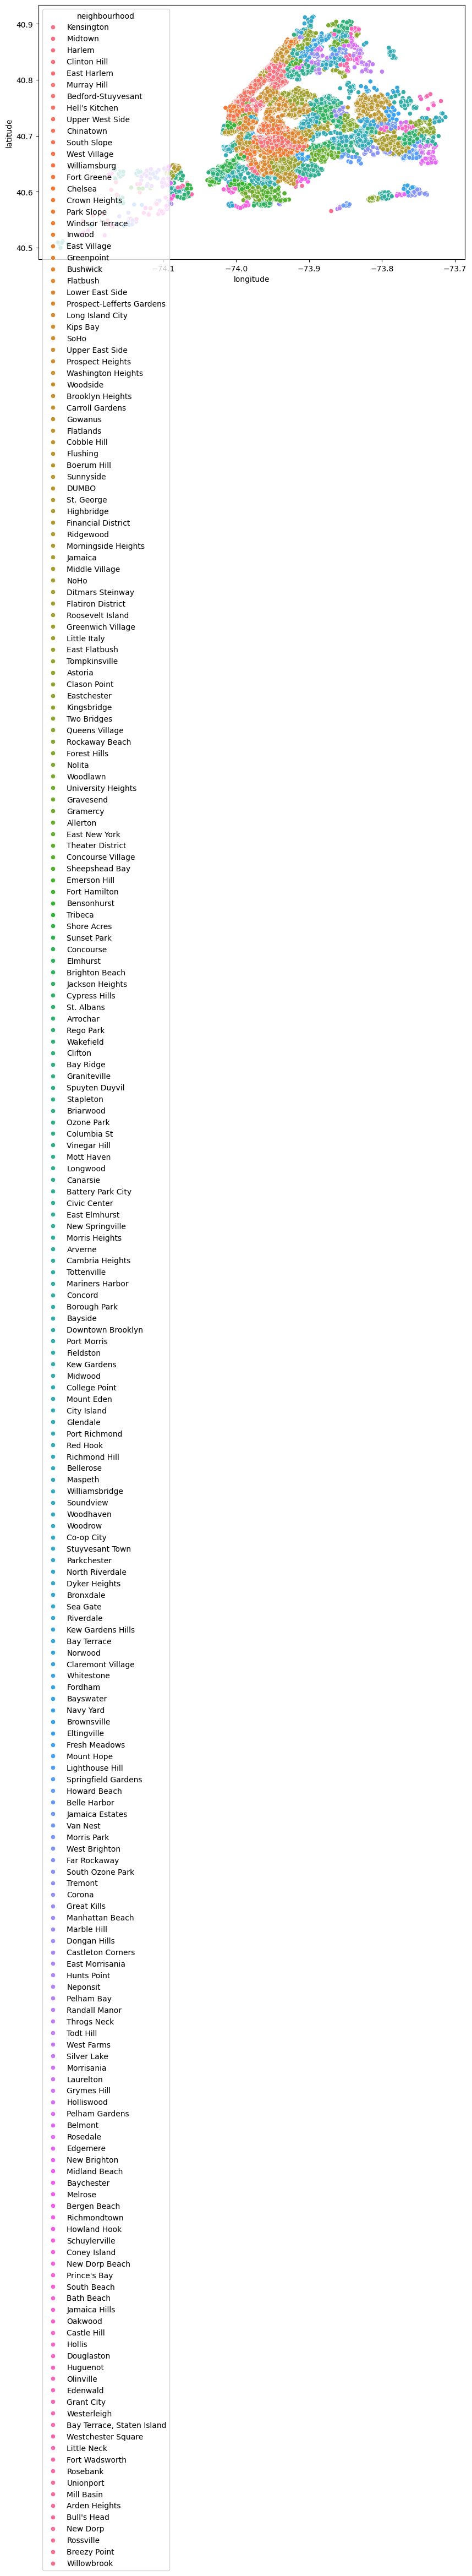

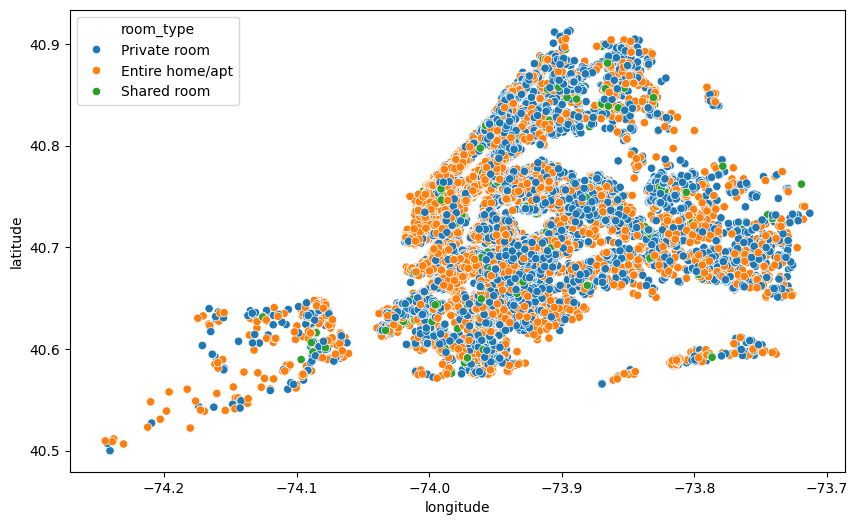

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.room_type)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

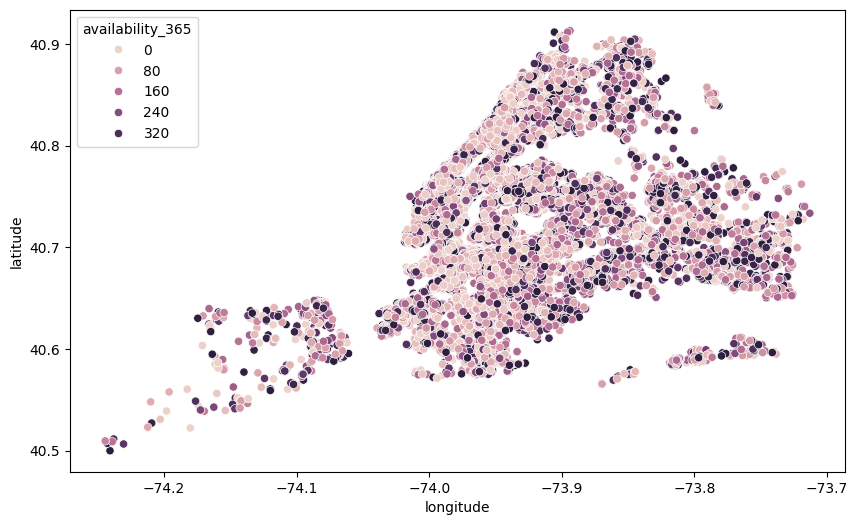

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.availability_365)
plt.show()

0이 너무나 많은 것을 확인할 수 있음

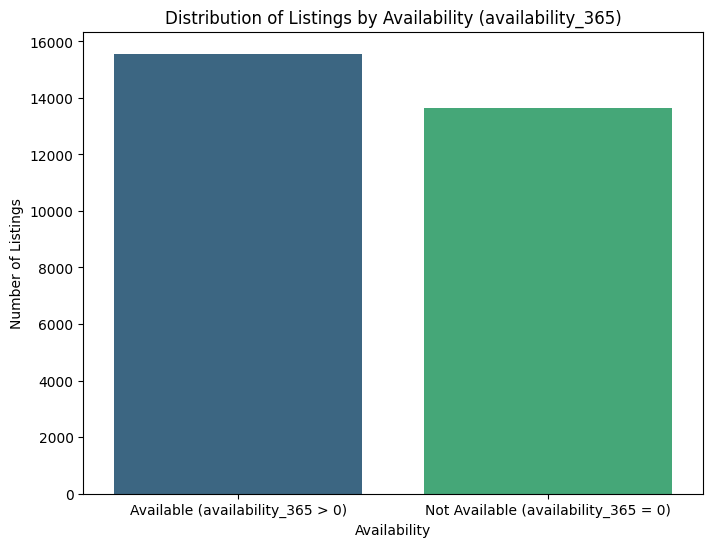

availability_365
Available (availability_365 > 0)        15565
Not Available (availability_365 = 0)    13638
Name: count, dtype: int64


In [ ]:
# Calculate the count of listings with availability_365 = 0 and > 0
availability_counts = airbnb['availability_365'].apply(lambda x: 'Available (availability_365 > 0)' if x > 0 else 'Not Available (availability_365 = 0)').value_counts()

# Create a bar chart to visualize the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=availability_counts.index, y=availability_counts.values, palette='viridis')
plt.title('Distribution of Listings by Availability (availability_365)')
plt.ylabel('Number of Listings')
plt.xlabel('Availability')
plt.show()

# Print the counts as well
print(availability_counts)

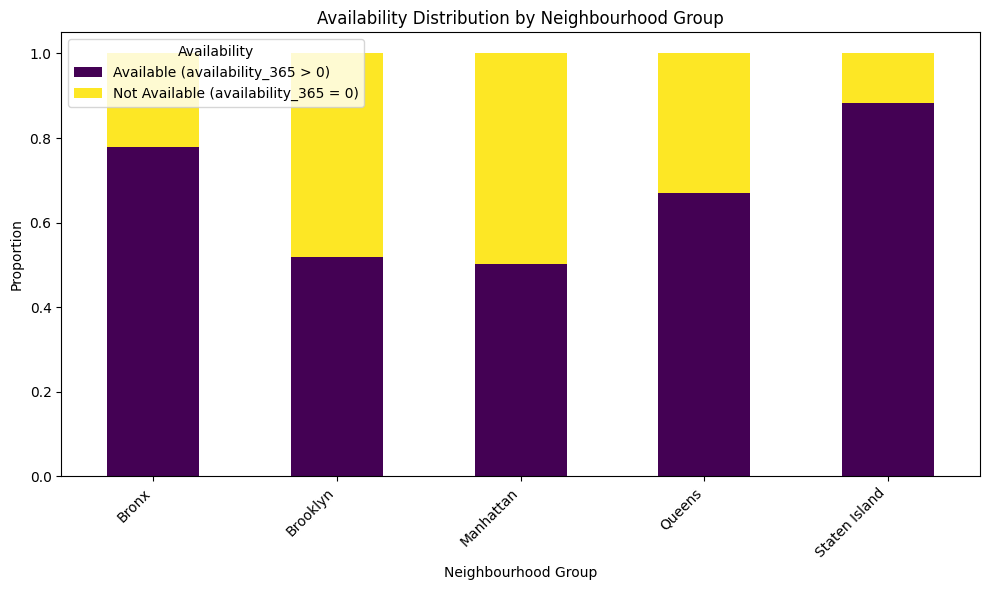

In [ ]:
# Create a new column 'availability_flag' to indicate whether availability_365 is 0 or > 0
airbnb['availability_flag'] = airbnb['availability_365'].apply(lambda x: 'Not Available (availability_365 = 0)' if x == 0 else 'Available (availability_365 > 0)')

# Cross-tabulation of neighbourhood_group and availability_flag
availability_by_neighbourhood_group = pd.crosstab(airbnb['neighbourhood_group'], airbnb['availability_flag'], normalize='index')

# Plotting the stacked bar chart
availability_by_neighbourhood_group.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Availability Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Availability')
plt.tight_layout()
plt.show()

## 지역 그룹별 가용성 분포 해석

이전 시각화 결과에서 볼 수 있듯이, **Manhattan**과 **Brooklyn** 지역은 다른 역에 비해 `availability_365`가 0인 숙소의 비율이 상대적으로 높음




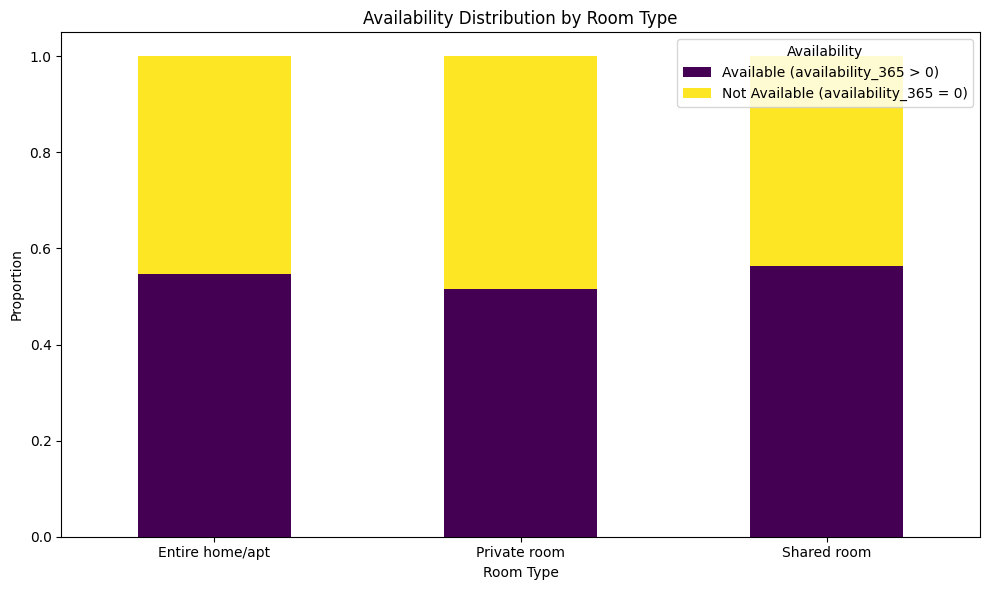

In [ ]:
# Cross-tabulation of room_type and availability_flag
availability_by_room_type = pd.crosstab(airbnb['room_type'], airbnb['availability_flag'], normalize='index')

# Plotting the stacked bar chart
availability_by_room_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Availability Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Proportion')
plt.xticks(rotation=0, ha='center')
plt.legend(title='Availability')
plt.tight_layout()
plt.show()

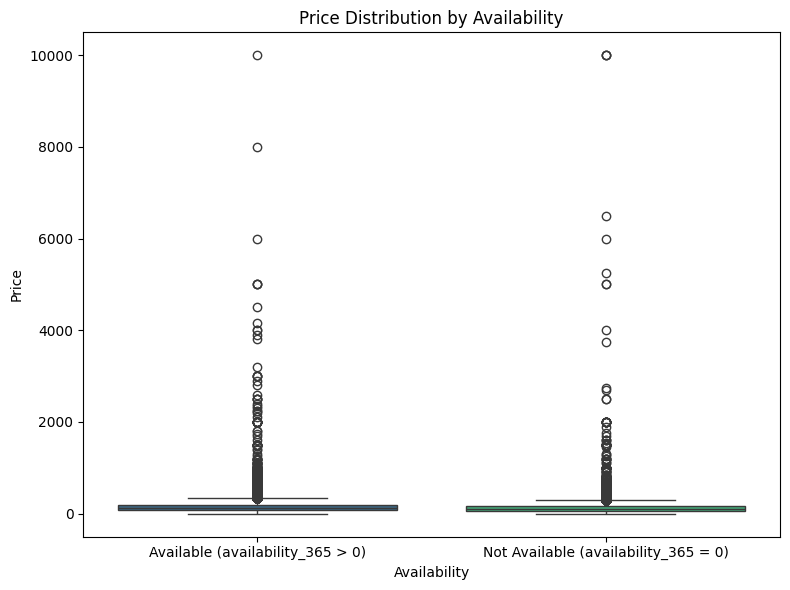

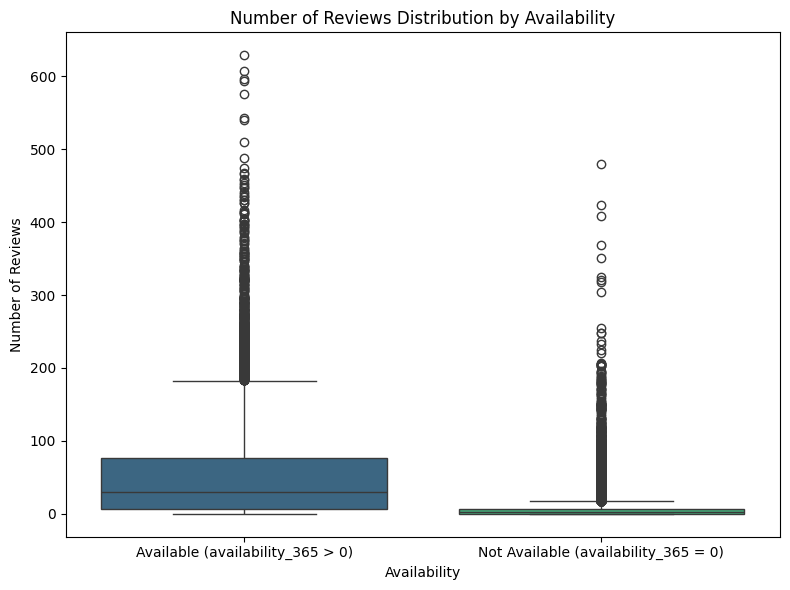

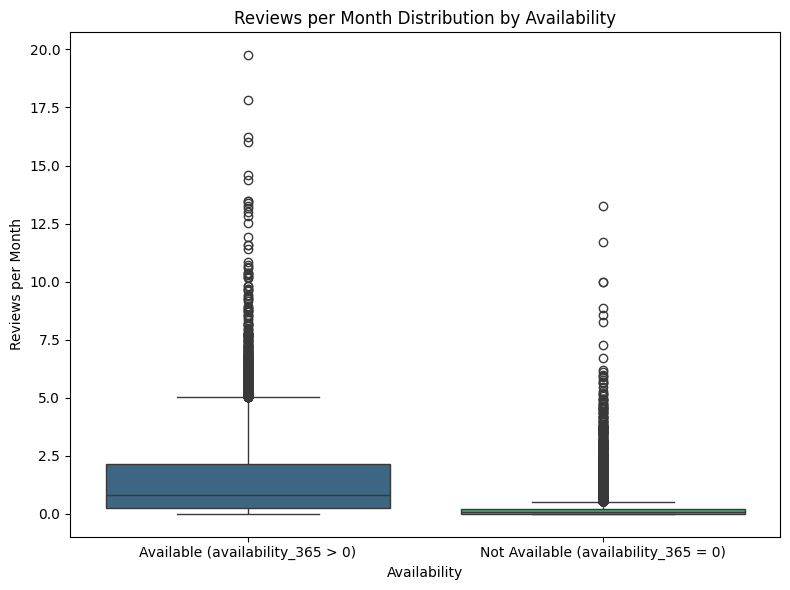

In [ ]:
# Compare price distribution based on availability
plt.figure(figsize=(8, 6))
sns.boxplot(data=airbnb, x='availability_flag', y='price', palette='viridis')
plt.title('Price Distribution by Availability')
plt.xlabel('Availability')
plt.ylabel('Price')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

# Compare number_of_reviews distribution based on availability
plt.figure(figsize=(8, 6))
sns.boxplot(data=airbnb, x='availability_flag', y='number_of_reviews', palette='viridis')
plt.title('Number of Reviews Distribution by Availability')
plt.xlabel('Availability')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

# Compare reviews_per_month distribution based on availability
plt.figure(figsize=(8, 6))
sns.boxplot(data=airbnb, x='availability_flag', y='reviews_per_month', palette='viridis')
plt.title('Reviews per Month Distribution by Availability')
plt.xlabel('Availability')
plt.ylabel('Reviews per Month')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

## 가격, 리뷰 수, 월별 리뷰 수와 가용성 분석 결과 해석

`availability_365`가 0인 숙소와 0보다 큰 숙소 간의 가격, 리뷰 수, 월별 리뷰 수 분포를 비교한 결과는 다음과 같습니다.

*   **가격 (price):** `availability_365`가 0인 숙소의 가격 분포는 0보다 큰 숙소에 비해 중앙값과 3사분위수가 낮게 나타납니다. 이는 1년 내내 예약이 불가능한 숙소들이 전반적으로 가격이 더 낮은 경향이 있음을 시사합니다. 하지만 두 그룹 모두 이상치로 인해 가격 범위는 넓게 분포합니다.
*   **리뷰 수 (number_of_reviews):** `availability_365`가 0인 숙소의 리뷰 수 분포는 0보다 큰 숙소에 비해 중앙값과 3사분위수가 현저히 낮습니다. 이는 1년 내내 예약이 불가능한 숙소들이 예약이 적거나, 최근 1년 동안 운영되지 않았을 가능성을 강하게 시사합니다.
*   **월별 리뷰 수 (reviews_per_month):** `availability_365`가 0인 숙소의 월별 리뷰 수 분포 역시 0보다 큰 숙소에 비해 중앙값과 3사분위수가 상당히 낮습니다. 이는 리뷰 수 결과와 일관되며, 해당 숙소들이 활발하게 운영되지 않고 있음을 다시 한번 보여줍니다.


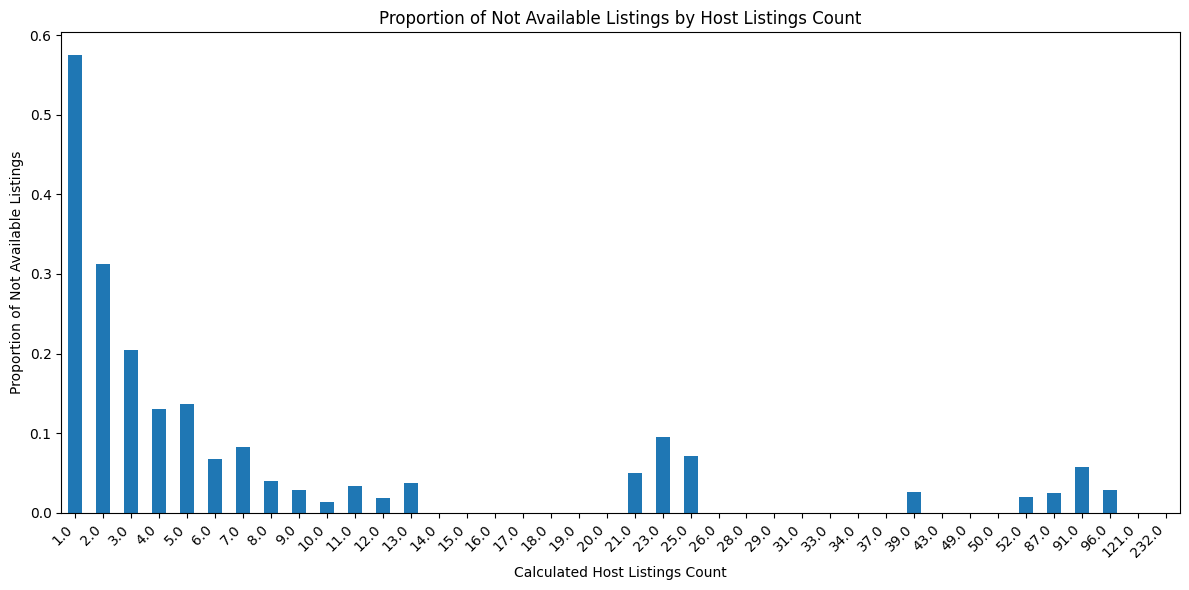

In [ ]:
# Calculate the proportion of listings with availability_365 = 0 for each calculated_host_listings_count
availability_by_host_listings = airbnb.groupby('calculated_host_listings_count')['availability_flag'].value_counts(normalize=True).unstack().fillna(0)

# Plotting the proportion of 'Not Available' listings by calculated_host_listings_count
plt.figure(figsize=(12, 6))
availability_by_host_listings['Not Available (availability_365 = 0)'].plot(kind='bar')
plt.title('Proportion of Not Available Listings by Host Listings Count')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Proportion of Not Available Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 호스트의 등록 숙소 수와 가용성 분석 결과 해석

`calculated_host_listings_count`에 따른 `availability_365`가 0인 숙소의 비율을 시각화한 결과를 보면 다음과 같은 특징을 확인 가능

*   **숙소 수가 적을수록 '0' 비중 높음:** 호스트가 가진 숙소의 수가 적을수록 (`calculated_host_listings_count` 값이 작을수록) 해당 숙소의 `availability_365`가 0일 확률이 높은 경향을 보입니다. 특히 1개의 숙소만 가진 호스트의 경우, 약 57%의 숙소가 1년 내내 예약이 불가능한 것으로 나타났음
*   **숙소 수가 많을수록 '0' 비중 낮음:** 호스트가 가진 숙소의 수가 많아질수록 (`calculated_host_listings_count` 값이 클수록) `availability_365`가 0인 숙소의 비율이 현저히 낮아집니다. 숙소 수가 10개 이상인 호스트의 경우, 대부분의 숙소가 1년 중 상당 기간 예약 가능한 것으로 보임

이 결과는 다음과 같은 가능성을 시사합니다.

*   **개인 호스트의 유연한 운영:** 1개의 숙소만 가진 개인 호스트는 자신이 거주하는 공간을 공유하거나 특정 기간에만 임대를 제공하는 경우가 많아 `availability_365`가 0인 경우가 많을 수 있습니다. 이는 본업이 따로 있거나 개인적인 사정에 따라 유연하게 숙소 운영을 조절하기 때문일 수 있습니다.

## `availability_365`가 0인 이유에 대한 종합적인 결론

지금까지의 분석 결과를 종합해 볼 때, `availability_365`가 0인 숙소는 주로 다음과 같은 특징을 가집니다.

*   **위치:** Manhattan과 Brooklyn과 같이 수요가 높은 지역에 집중되어 있습니다.
*   **호스트 유형:** 1개의 숙소만 가진 개인 호스트의 숙소일 가능성이 높습니다.
*   **운영 방식:** 특정 기간에만 임대하거나, 본인이 거주하는 공간을 공유하거나, 최근 1년 동안 활발하게 운영되지 않았을 수 있습니다.
*   **수요와 공급:** 높은 수요로 인해 빠르게 예약이 마감되거나, 호스트가 장기 임대를 선호하여 단기 가용성이 낮은 경우도 있을 수 있습니다.

In [ ]:
from wordcloud import WordCloud

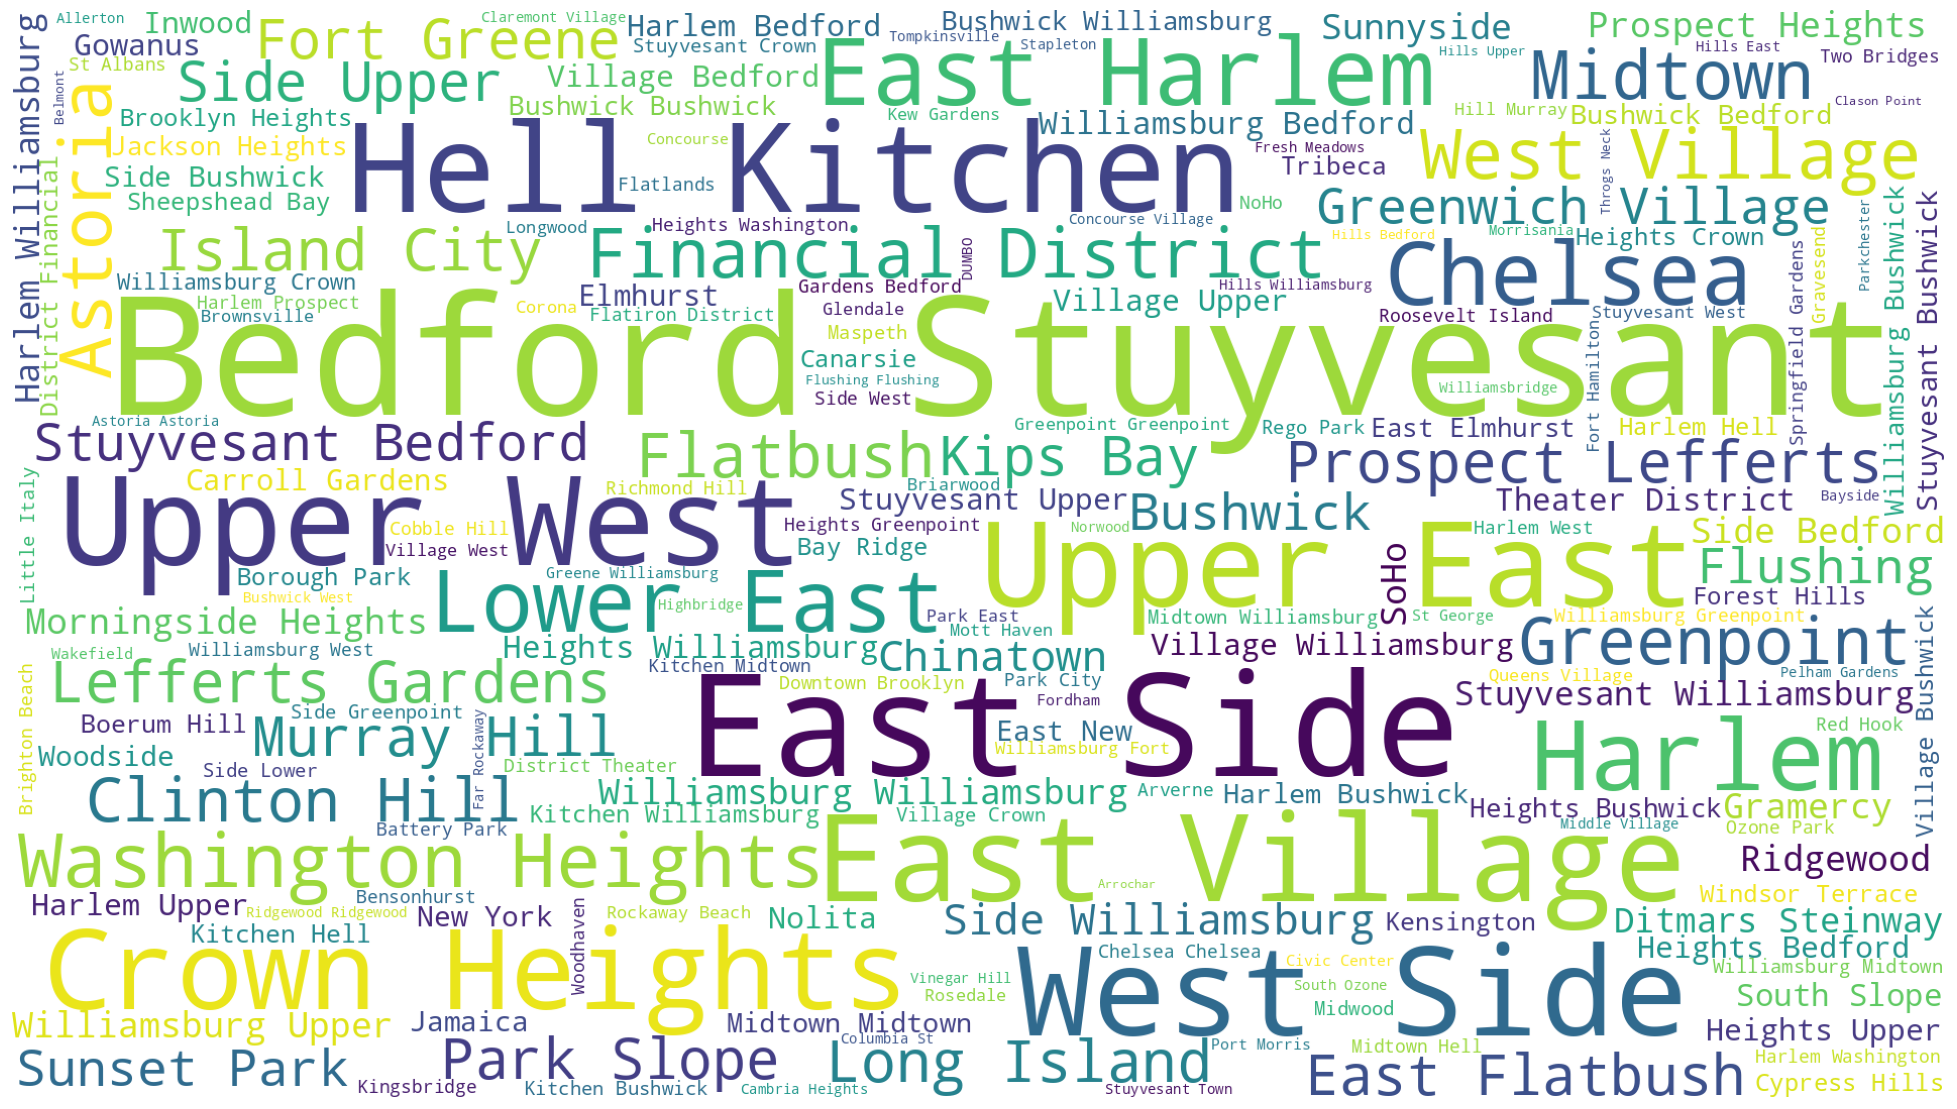

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(airbnb.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [ ]:
airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
airbnb.head(5)

neighbourhood_group        room_type  price  minimum_nights  \
0            Brooklyn     Private room    149               1   
1           Manhattan  Entire home/apt    225               1   
2           Manhattan     Private room    150               3   
3            Brooklyn  Entire home/apt     89               1   
4           Manhattan  Entire home/apt     80              10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [ ]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())

In [ ]:
airbnb_en.head(15)

neighbourhood_group  room_type  price  minimum_nights  \
0                     0          0    149               1   
1                     1          1    225               1   
2                     1          0    150               3   
3                     0          1     89               1   
4                     1          1     80              10   
5                     1          1    200               3   
6                     0          0     60              45   
7                     1          0     79               2   
8                     1          0     79               2   
9                     1          1    150               1   
10                    1          1    135               5   
11                    1          0     85               2   
12                    0          0     89               4   
13                    1          0     85               2   
14                    1          1    120              90   

    calculated_host_listings_count  availability_365  
0                                6               365  
1                                2               355  
2                                1               365  
3                                1               194  
4                                1                 0  
5                                1               129  
6                                1                 0  
7                                1               220  
8                                1                 0  
9                                4               188  
10                               1                 6  
11                               1                39  
12                               3               314  
13                               1               333  
14                               1                 0

In [ ]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17736    125
24351    101
10069    189
11679    145
16315    120
Name: price, dtype: int64

In [ ]:
x_train.shape

(44005, 5)

In [ ]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.07480306392848757